In [1]:
# Install library 
!pip install indic-transliteration

In [2]:
# How to use it?
from indic_transliteration import sanscript
from indic_transliteration.sanscript import SchemeMap, SCHEMES, transliterate
text = transliterate('DftarAzwraH uvAca Darma kzetre kuru kzetre samavetAH yuyutsavaH mAmakAH pARqavAH ca eva kim akurvata saYjaya', sanscript.SLP1,sanscript.DEVANAGARI)
# What all schemes are available?
# (1) sanscript.ITRANS (2) sanscript.DEVANAGARI (3) sanscript.VELTHUIS 
# (4) sanscript.SLP1 (5) sanscript.IAST (6) sanscript.WX (7) sanscript.HK

In [3]:
text

'धृतराष्ट्रः उवाच धर्म क्षेत्रे कुरु क्षेत्रे समवेताः युयुत्सवः मामकाः पाण्डवाः च एव किम् अकुर्वत सञ्जय'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data= pd.read_csv('C://Users//USER//OneDrive//Documents//IITK NLP-OCR PROJECT//corpus_word_sentence.txt', header=None)
data.head()

,0
0,DftarAzwraH uvAca Darma kzetre kuru kzetre sam...
1,saYjayaH uvAca dfzwvA tu pARqava anIkam vyUQam...
2,paSya etAm pARqu putrAnAm AcArya mahatIm camUm...
3,atra SUrAH mahA izu AsAH BIma arjuna samAH yuD...
4,DfzwaketuH cekitAnaH kASirAjaH ca vIrya vAn pu...


In [6]:
data.shape

(783234, 1)

In [7]:
data[2: 5]

,0
2,paSya etAm pARqu putrAnAm AcArya mahatIm camUm...
3,atra SUrAH mahA izu AsAH BIma arjuna samAH yuD...
4,DfzwaketuH cekitAnaH kASirAjaH ca vIrya vAn pu...


In [8]:
data.dtypes

0    object
dtype: object

In [9]:
data.columns= ['Text_Rows']
data.head()

,Text_Rows
0,DftarAzwraH uvAca Darma kzetre kuru kzetre sam...
1,saYjayaH uvAca dfzwvA tu pARqava anIkam vyUQam...
2,paSya etAm pARqu putrAnAm AcArya mahatIm camUm...
3,atra SUrAH mahA izu AsAH BIma arjuna samAH yuD...
4,DfzwaketuH cekitAnaH kASirAjaH ca vIrya vAn pu...


In [10]:
text_lines= data['Text_Rows']
text_lines.head()

0    DftarAzwraH uvAca Darma kzetre kuru kzetre sam...
1    saYjayaH uvAca dfzwvA tu pARqava anIkam vyUQam...
2    paSya etAm pARqu putrAnAm AcArya mahatIm camUm...
3    atra SUrAH mahA izu AsAH BIma arjuna samAH yuD...
4    DfzwaketuH cekitAnaH kASirAjaH ca vIrya vAn pu...
Name: Text_Rows, dtype: object

In [11]:
text_lines[0]

'DftarAzwraH uvAca Darma kzetre kuru kzetre samavetAH yuyutsavaH mAmakAH pARqavAH ca eva kim akurvata saYjaya '

In [12]:
len(text_lines)

783234

In [13]:
# text_dev= []

In [14]:
import pickle 

In [15]:
# for text in text_lines:
#     sanskrit_text= transliterate(text, sanscript.SLP1,sanscript.DEVANAGARI)
#     text_dev.append(sanskrit_text)

In [16]:
# with open('text_dev', 'wb') as f: 
#     pickle.dump(text_dev, f) 

In [17]:
with open('text_dev', 'rb') as f: 
    text_dev = pickle.load(f) 

In [18]:
text_dev[0]

'धृतराष्ट्रः उवाच धर्म क्षेत्रे कुरु क्षेत्रे समवेताः युयुत्सवः मामकाः पाण्डवाः च एव किम् अकुर्वत सञ्जय '

In [19]:
type(text_dev[0])

str

In [20]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


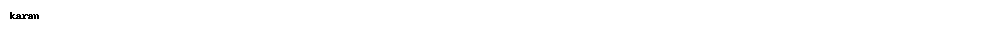

In [21]:
from PIL import Image, ImageDraw, ImageFont

width = 1000
height = 40
message = 'karan'
img = Image.new('L', (width, height), color='white')

imgDraw = ImageDraw.Draw(img)
imgDraw.text((10, 10), message)

img

In [22]:
# img.save("Karan.png")

In [23]:
fnt = ImageFont.truetype('C://Users//USER//OneDrive//Documents//IITK NLP-OCR PROJECT//NotoSans-Regular.ttf', 23)

In [24]:
def img_generation(text):
    img = Image.new('L', (1200, 55), color= 'white')
    d = ImageDraw.Draw(img)
    d.text((10,10), text , font=fnt, fill="black", align="right")
    
    return img

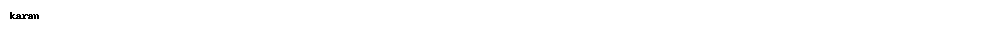

In [25]:
img

In [26]:
#img.save('amol.jpeg')

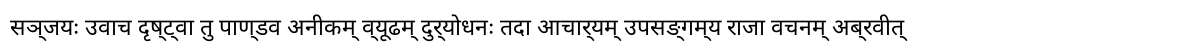

In [27]:
img2= img_generation(text_dev[1])
img2

In [44]:
i=1

for text in text_dev:
    if(i< 1000):
        img= img_generation(text)
        image_name= str(i)+ '.jpeg'
        i = i+1
        img.save(image_name)

In [28]:
import cv2
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [29]:
path = 'imgs_pure_white//4.jpeg'

def display(path):
    img= plt.imread(path)
    dpi= 80
    height, width  = img.shape[:2]

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(img, cmap='gray')

    plt.show()

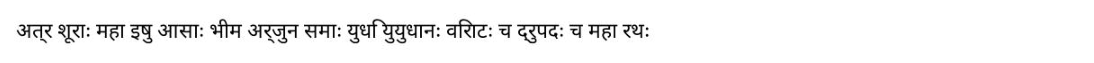

In [30]:
display(path)

In [31]:
img= cv2.imread(path)

In [32]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [33]:
gray_image = grayscale(img)
cv2.imwrite(path, gray_image)

True

In [34]:
thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
cv2.imwrite(path, im_bw)

True

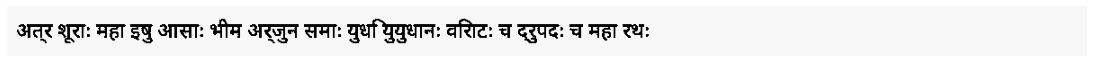

In [35]:
display(path)

In [36]:
no_noise = noise_removal(im_bw)
cv2.imwrite(path, no_noise)

True

In [37]:
def thin_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

In [38]:
eroded_image = thin_font(no_noise)
cv2.imwrite(path, eroded_image)

True

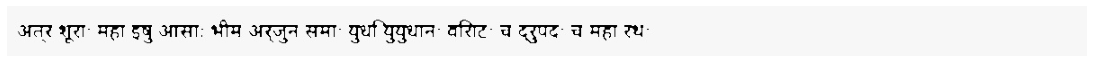

In [39]:
display(path)

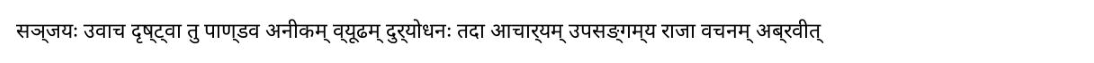

In [40]:
path= 'imgs_pure_white//'+ str(2)+ '.jpeg'
display(path)

In [43]:
import cv2
for i in range(1, 999):
    path= 'imgs_pure//'+ str(i)+ '.jpeg'
    img= cv2.imread(path)
    gray_image = grayscale(img)
    
    if(i<= 300):
        thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
        cv2.imwrite(path, im_bw)
        
    elif(i>300 and i<=600):
        thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
        cv2.imwrite(path, im_bw)
        noise = noise_removal(im_bw)
        cv2.imwrite(path, noise)
        
    elif(i>600 and i<=999):
        thresh, im_bw = cv2.threshold(gray_image, 210, 230, cv2.THRESH_BINARY)
        cv2.imwrite(path, im_bw)
        noise = noise_removal(im_bw)
        cv2.imwrite(path, noise)
        eroded_image = thin_font(noise)
        cv2.imwrite(path, eroded_image)
    i= i+1

In [41]:
import tensorflow as tf 

import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output

AUTOTUNE = tf.data.AUTOTUNE

#### Concatenate 2 images from domain A and domain B to form a single image :

In [42]:
import os
import numpy as np
from PIL import Image
import cv2

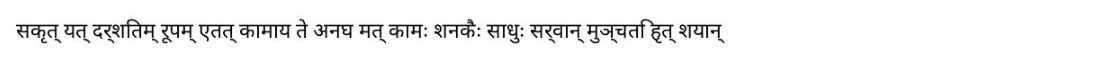

In [48]:
path1= 'imgs_pure_white//850.jpeg'
path2= 'imgs_pure//850.jpeg'

display(path1)

In [49]:
img1 = cv2.imread(path1)
img2 = cv2.imread(path2)

In [50]:
# define a function for horizontally 
# concatenating images of different
# heights 
def hconcat_resize(img_list, 
                   interpolation 
                   = cv2.INTER_CUBIC):
      # take minimum hights
    h_min = min(img.shape[0] 
                for img in img_list)
      
    # image resizing 
    im_list_resize = [cv2.resize(img,
                       (int(img.shape[1] * h_min / img.shape[0]),
                        h_min), interpolation
                                 = interpolation) 
                      for img in img_list]
      
    # return final image
    return cv2.hconcat(im_list_resize)

In [51]:
# function calling
img_h_resize = hconcat_resize([img1, img2])
  
# show the Output image
cv2.imshow('hconcat_resize.jpg', img_h_resize)

In [64]:
# horizontally concatenates images
# of same height 
# im_h = cv2.vconcat([img1, img2])
  
# show the output image
# cv2.imshow('image.jpeg' ,im_h)

In [52]:
import os
import numpy as np
from PIL import Image
import cv2

In [71]:
img_concatenated= []
k=1
for i in range(1, 1000):
    path= 'imgs_pure_white//'+ str(i)+ '.jpeg'
    img= cv2.imread(path)
    
    img_concatenated.append(img)
    
    if(i%20== 0):
        img= cv2.vconcat(img_concatenated)
        
        imgs = Image.fromarray(img, 'RGB')
        imgs.save(str(k)+'.jpeg')
        k= k+1
        
        img_concatenated= []

In [54]:
img_concatenated= []
k=1
for i in range(1, 1000):
    path= 'imgs_pure_white//'+ str(i)+ '.jpeg'
    img= cv2.imread(path)
    
    img_concatenated.append(img)
    
    if(i%20== 0):
        img= cv2.vconcat(img_concatenated)
        
        imgs = Image.fromarray(img, 'RGB')
        imgs.save(str(k)+'.jpeg')
        k= k+1
        
        img_concatenated= []

In [53]:
# def random_crop(image):
#     cropped_image= tf.image.random_crop(
#                     image, size=[256, 256, 3], )
    
#     return cropped_image

In [54]:
img= Image.open('concat_pure//44.jpeg')

left = 0
top = 0
right = 256
bottom = 256
 
# Cropped image of above dimension
# (It will not change original image)
im1 = img.crop((left, top, right, bottom))
im1.save('crop.jpeg')
# Shows the image in image viewer
im1.show()

In [64]:
img= cv2.imread('concat_pure//4.jpeg')

In [72]:
# cropped_img= random_crop(img)
# cropped_img

In [55]:
def randomCrop(path, left, top, right, bottom):
    img= Image.open(path)
    im1= img.crop((left, top, right, bottom))
    return im1

In [56]:
# def tensor_to_image(tensor):
#     tensor = tensor*255
#     tensor = np.array(tensor, dtype=np.uint8)
#     if np.ndim(tensor)>3:
#         assert tensor.shape[0] == 1
#         tensor = tensor[0]
#     return Image.fromarray(tensor)

In [57]:
# img= tensor_to_image(cropped_img)

In [58]:
# img.save('karan1.jpeg')

In [59]:
# img1= cv2.imread('1.jpeg')

In [60]:
# inverted_image = cv2.bitwise_not(img1)
# imgs = Image.fromarray(inverted_image, 'RGB')
# imgs.save('1.jpeg')
# imgs.show()

In [86]:
k=1
for i in range(1, 50):
    
    path= 'concat_distorted//'+ str(i)+ '.jpeg'
    img= cv2.imread(path)
    j=1
    
    for j in range(3):
        
        cropped_img= randomCrop(path, 256*j, 0, 256*j+256 , 256)
        cropped_img.save(str(k)+'.jpeg')
        cropped_img= randomCrop(path, 256*j, 257, 256*j+256 ,513)
        cropped_img.save(str(k+1)+'.jpeg')
        cropped_img= randomCrop(path, 256*j, 514 , 256*j +256, 770)
        cropped_img.save(str(k+2)+'.jpeg')
        cropped_img= randomCrop(path, 256*j, 771 , 256*j+256 , 1027)
        cropped_img.save(str(k+2)+'.jpeg')
        k= k+3
        

In [86]:
img1 = cv2.imread('crop_pure//1.jpeg')
img2 = cv2.imread('crop_distorted//1.jpeg')

In [87]:
img_concat= cv2.hconcat([img1, img2])
imgs = Image.fromarray(img_concat, 'RGB')
imgs.save('k.jpeg')

In [104]:
i=1
k=1
for i in range(1, 442):
    
    img1= Image.open('crop_pure//'+ str(i)+ '.jpeg')
    img2= Image.open('crop_distorted//'+ str(i)+ '.jpeg')
    
    img1_size = img1.resize((256, 256))
    img2_size = img2.resize((256, 256))
    
    imgs = Image.new("RGB", (512, 256), "white")
    
    imgs.paste(img2_size, (0, 0))
    imgs.paste(img1_size, (256, 0))
    
    imgs.save(str(k)+ '.jpeg')
    k= k+1

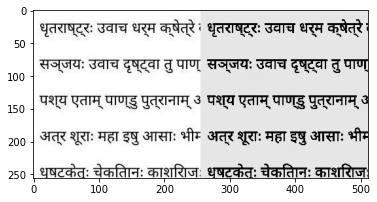

In [103]:
# opening up of images
img = Image.open('crop_pure//1.jpeg')
img1 = Image.open('crop_distorted//1.jpeg')

img_size = img.resize((256, 256))
img1_size = img1.resize((256, 256))
  
# creating a new image and pasting 
# the images
img2 = Image.new("RGB", (512, 256), "white")
  
# pasting the first image (image_name,
# (position))
img2.paste(img_size, (0, 0))
  
# pasting the second image (image_name,
# (position))
img2.paste(img1_size, (256, 0))
  
plt.imshow(img2)

#### Pix2Pix :

In [105]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display

In [109]:
"""
scale_images.py
Function to scale any image to the pixel values of [-1, 1] for GAN input.
Author: liuhh02 https://machinelearningtutorials.weebly.com/
"""
from PIL import Image
import numpy as np
from os import listdir

def normalize(arr):
    ''' Function to scale an input array to [-1, 1] '''
    arr_min = arr.min()
    arr_max = arr.max()
    # Check the original min and max values
    print('Min: %.3f, Max: %.3f' % (arr_min, arr_max))
    arr_range = arr_max - arr_min
    scaled = np.array((arr-arr_min) / float(arr_range), dtype='f')
    arr_new = -1 + (scaled * 2)
    # Make sure min value is -1 and max value is 1
    print('Min: %.3f, Max: %.3f' % (arr_new.min(), arr_new.max()))
    return arr_new

# path to folder containing images
path = 'data_pix2pix//'

# loop through all files in the directory
for filename in listdir(path):
	# load image
	image = Image.open(path + filename)
	# convert to numpy array
	image = np.array(image)
	# scale to [-1,1]
	image = normalize(image)

Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255

Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.

Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255.000
Min: -1.000, Max: 1.000
Min: 0.000, Max: 255

In [110]:
path= 'data_pix2pix//'

In [124]:
sample_image = tf.io.read_file(path+'train//1.jpeg')
sample_image = tf.io.decode_jpeg(sample_image)
print(sample_image.shape)

(256, 512, 3)


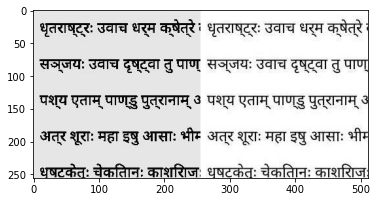

In [125]:
plt.figure()
plt.imshow(sample_image)

In [126]:
def load(image_file):
  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

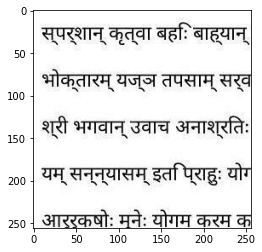

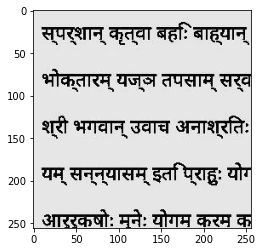

In [128]:
inp, re = load(path+'train//100.jpeg')
# Casting to int for matplotlib to display the images
plt.figure()
plt.imshow(inp / 255.0)
plt.figure()
plt.imshow(re / 255.0)

In [129]:
# The facade training set consist of 400 images
BUFFER_SIZE = 431
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [130]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [131]:
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(
      stacked_image, size=[2, IMG_HEIGHT, IMG_WIDTH, 3])

  return cropped_image[0], cropped_image[1]

In [132]:
@tf.function()
def random_jitter(input_image, real_image):
  # Resizing to 286x286
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # Random cropping back to 256x256
  input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

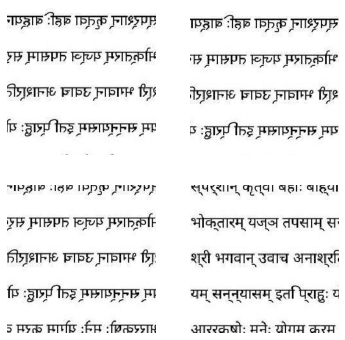

In [134]:
plt.figure(figsize=(6, 6))
for i in range(4):
  rj_inp, rj_re = random_jitter(inp, re)
  plt.subplot(2, 2, i + 1)
  plt.imshow(rj_inp / 255.0)
  plt.axis('off')
plt.show()

In [151]:
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
#   input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [153]:
# load_image_train(path+'train//100.jpeg')

In [154]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
#   input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [155]:
train_dataset = tf.data.Dataset.list_files(path+'train/*.jpeg')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [156]:
test_dataset = tf.data.Dataset.list_files(path+ 'test/*.jpeg')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [157]:
OUTPUT_CHANNELS = 3

In [158]:
def downsample(filters, size, apply_batchnorm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))

  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())

  result.add(tf.keras.layers.LeakyReLU())

  return result

In [159]:
down_model = downsample(3, 4)
down_result = down_model(tf.expand_dims(inp, 0))
print (down_result.shape)

(1, 128, 128, 3)


In [160]:
def upsample(filters, size, apply_dropout=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer=initializer,
                                    use_bias=False))

  result.add(tf.keras.layers.BatchNormalization())

  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result

In [161]:
up_model = upsample(3, 4)
up_result = up_model(down_result)
print (up_result.shape)

(1, 256, 256, 3)


In [162]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256, 256, 3])

  down_stack = [
    downsample(64, 4, apply_batchnorm=False),  # (batch_size, 128, 128, 64)
    downsample(128, 4),  # (batch_size, 64, 64, 128)
    downsample(256, 4),  # (batch_size, 32, 32, 256)
    downsample(512, 4),  # (batch_size, 16, 16, 512)
    downsample(512, 4),  # (batch_size, 8, 8, 512)
    downsample(512, 4),  # (batch_size, 4, 4, 512)
    downsample(512, 4),  # (batch_size, 2, 2, 512)
    downsample(512, 4),  # (batch_size, 1, 1, 512)
  ]

  up_stack = [
    upsample(512, 4, apply_dropout=True),  # (batch_size, 2, 2, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 4, 4, 1024)
    upsample(512, 4, apply_dropout=True),  # (batch_size, 8, 8, 1024)
    upsample(512, 4),  # (batch_size, 16, 16, 1024)
    upsample(256, 4),  # (batch_size, 32, 32, 512)
    upsample(128, 4),  # (batch_size, 64, 64, 256)
    upsample(64, 4),  # (batch_size, 128, 128, 128)
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')  # (batch_size, 256, 256, 3)

  x = inputs

  # Downsampling through the model
  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)

  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

In [163]:
generator = Generator()
tf.keras.utils.plot_model(generator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


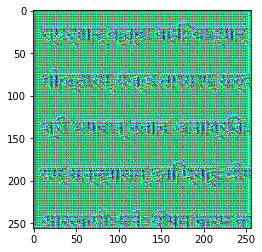

In [164]:
gen_output = generator(inp[tf.newaxis, ...], training=False)
plt.imshow(gen_output[0, ...])

In [165]:
LAMBDA = 100

In [166]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [167]:
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [168]:
def Discriminator():
  initializer = tf.random_normal_initializer(0., 0.02)

  inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
  tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')

  x = tf.keras.layers.concatenate([inp, tar])  # (batch_size, 256, 256, channels*2)

  down1 = downsample(64, 4, False)(x)  # (batch_size, 128, 128, 64)
  down2 = downsample(128, 4)(down1)  # (batch_size, 64, 64, 128)
  down3 = downsample(256, 4)(down2)  # (batch_size, 32, 32, 256)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  # (batch_size, 34, 34, 256)
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)  # (batch_size, 31, 31, 512)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)  # (batch_size, 33, 33, 512)

  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)  # (batch_size, 30, 30, 1)

  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [169]:
discriminator = Discriminator()
tf.keras.utils.plot_model(discriminator, show_shapes=True, dpi=64)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


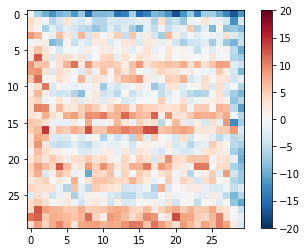

In [170]:
disc_out = discriminator([inp[tf.newaxis, ...], gen_output], training=False)
plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
plt.colorbar()

In [171]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_disc_loss = real_loss + generated_loss

  return total_disc_loss

In [172]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [173]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [174]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


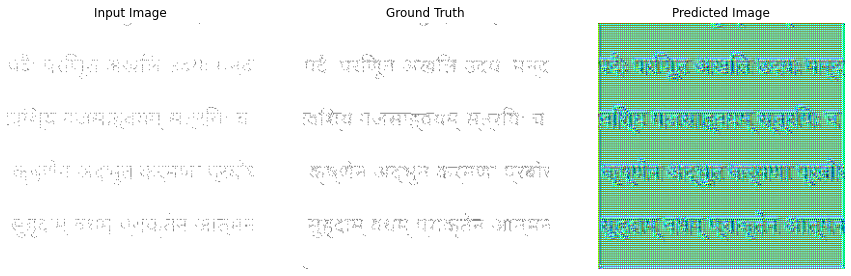

In [175]:
for example_input, example_target in test_dataset.take(1):
  generate_images(generator, example_input, example_target)

In [176]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [177]:
@tf.function
def train_step(input_image, target, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_output = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target], training=True)
    disc_generated_output = discriminator([input_image, gen_output], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [178]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      generate_images(generator, example_input, example_target)
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)

    # Training step
    if (step+1) % 10 == 0:
      print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
    if (step + 1) % 5000 == 0:
      checkpoint.save(file_prefix=checkpoint_prefix)

In [180]:
# %load_ext tensorboard
# %tensorboard --logdir {log_dir}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


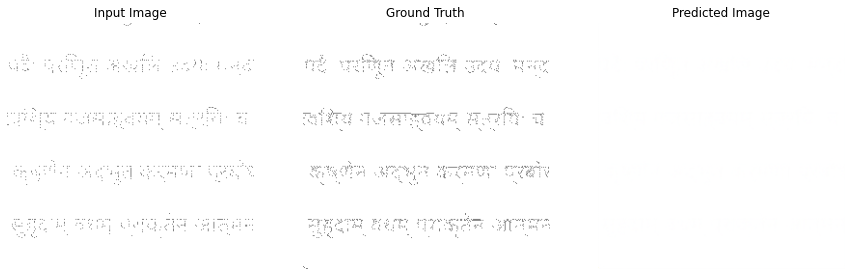

Step: 0k


In [183]:
fit(train_dataset, test_dataset, steps=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


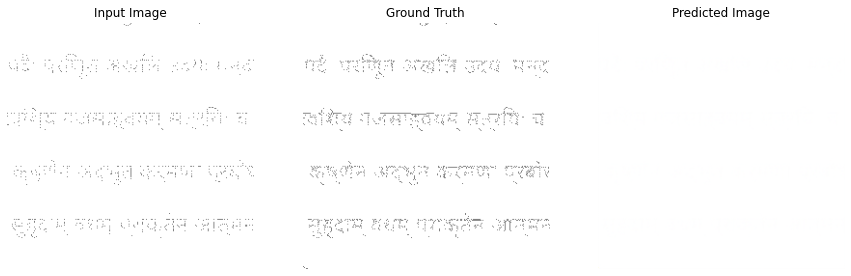

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


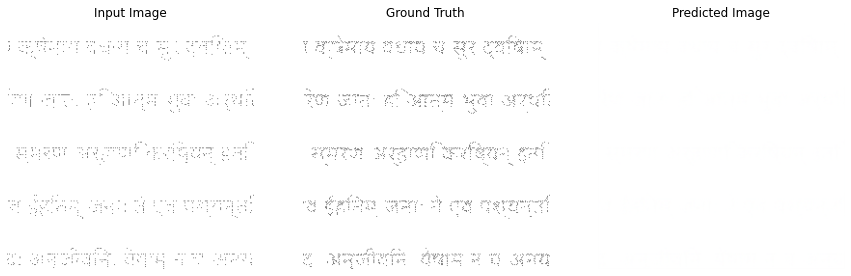

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


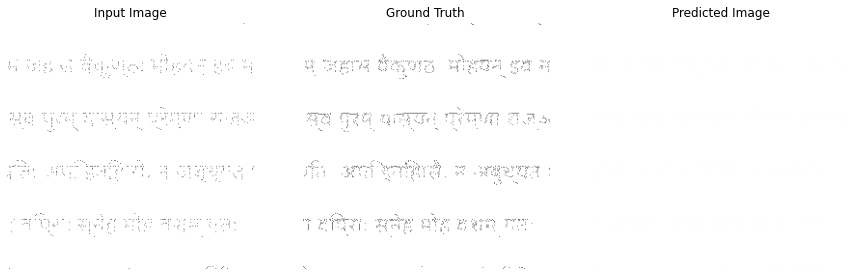

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


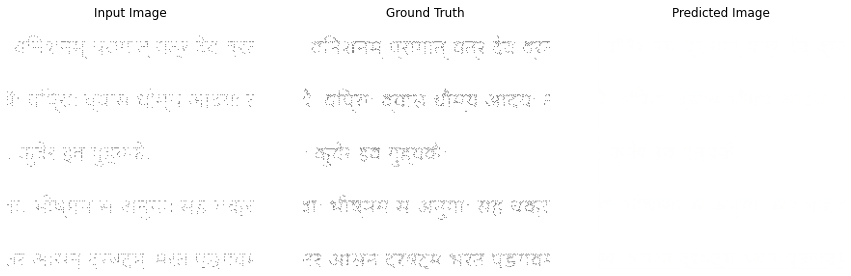

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


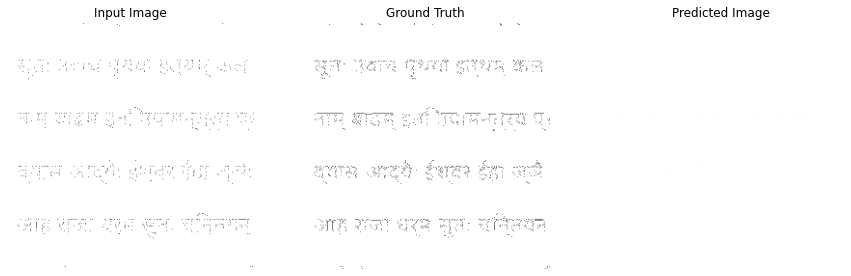

In [184]:
# Run the trained model on a few examples from the test set
for inp, tar in test_dataset.take(5):
  generate_images(generator, inp, tar)